# Demo: Using a pre-trained model

This short notebook will illustrate how you can load our pre-trained models and run them to generate pressure-temperature profiles.

## Preliminaries: Downloading a trained model

For this mini-tutorial, we are going to use a $\dim(z)=2$ model trained on the PyATMOS dataset, which you can download [here](https://edmond.mpdl.mpg.de/file.xhtml?fileId=223765) by clicking "Access data" ➝ "Original File Format" ➝ "Accept". Once the download is complete, place the file (`decoder.onnx`) in the same folder as this Jupyter notebook.

Note: All of our other models are available [here](https://edmond.mpdl.mpg.de/dataset.xhtml?persistentId=doi:10.17617/3.K2CY3M). 

## Loading and running the pre-trained model

We assume here that you have installed the `ml4ptp` package as described in the main README of the repositoy (preferably in a separate virtualenv).

In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from ml4ptp.exporting import PTProfile

### Evaluate a profile for some value of `z` on a given pressure grid

In [3]:
# Load the pretrained model into a wrapper; see code for a few extra
# convenience options that this wrapper provides
pt_profile = PTProfile("decoder.onnx")

# Define a grid of log-pressures
log_P = np.linspace(-5, 0, 100)

# Define z --- this will determine the shape of the PT profile
# This needs to be 2 numbers, since we loaded a 2D model
z = np.array([1.5, 0.5])

# Evaluate the profile defined by `z` on the given log-pressure grid
T = pt_profile(z=z, log_P=log_P)

### Plot the result following the usual conventions

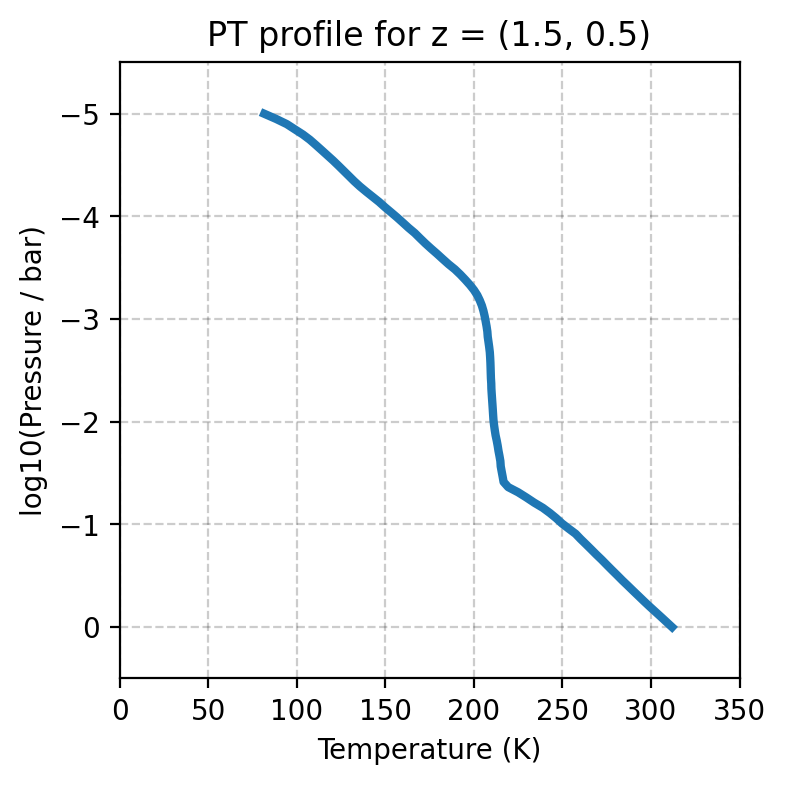

In [4]:
fig, ax = plt.subplots(figsize=(4, 4))

ax.set_title(f"PT profile for z = {tuple(z)}")
ax.set_xlabel("Temperature (K)")
ax.set_ylabel("log10(Pressure / bar)")
ax.set_xlim(0, 350)
ax.set_ylim(0.5, -5.5)
ax.grid(ls="--", alpha=0.2, color="black")

ax.plot(T, log_P, lw=3)

plt.show()